In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/messages.csv'


'/content/drive/My Drive/messages.csv'


In [ ]:
import pandas as pd

# Example for a CSV file
dataset = pd.read_csv('/content/drive/My Drive/messages.csv')

In [ ]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [ ]:
df = dataset.drop('subject', axis=1)
df

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
...,...,...
2888,hello thanks for stopping by ! ! we have taken...,1
2889,"the list owner of : "" kiddin "" has invited you...",1
2890,"judging from the return post , i must have sou...",0
2891,gotcha ! there are two separate fallacies in t...,0


In [ ]:
df.isnull().sum()

,0
message,0
label,0


In [ ]:
df.duplicated().sum()

34

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:

values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 83.98041273172437
percentage of 1 : 16.01958726827562


In [ ]:
!pip install emoji --upgrade
import pandas as pd
import re
import emoji
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk


def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Convert emojis to text
    text = emoji.demojize(text)

    # Remove stopwords, but retain important ones for spam context
    important_stopwords = {"click", "here", "call", "now", "free", "win"}
    words = text.split()
    words = [word for word in words if word not in en_stopwords or word in important_stopwords]
    text = " ".join(words)

    # Extract and preserve special features like URLs, hashtags, and email addresses
    urls = re.findall(r'(https?://\S+)', text)
    hashtags = re.findall(r'#\w+', text)
    emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)

    # Remove unwanted special characters but keep important ones
    text = re.sub(r"[^\w\s#@]", "", text)  # Keep # and @

    # Remove newline characters
    text = text.replace('\n', ' ')

    # Lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = " ".join(words)

    # Append preserved features
    if urls:
        text += " " + " ".join(urls)
    if hashtags:
        text += " " + " ".join(hashtags)
    if emails:
        text += " " + " ".join(emails)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text
df['message'] = df['message'].apply(clean_text)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 6.9 MB/s eta 0:00:00


NameError: name 'en_stopwords' is not defined

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df['message']
y = df['label']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

In [ ]:
X_train

,message
2873,query also posted seelangs apology advance red...
1922,publication list indiana university linguistic...
2689,two week ago posted query two subject looking ...
803,adult dare click
2667,earn per year sending email dear friend earn n...
...,...
1924,saturday may oneday symposium chinese historic...
493,content length sending following announcement ...
1764,dear linguist member week ago published reques...
1903,international journal sociology language issue...


In [ ]:

!pip install gensim
import random
import numpy as np
import pandas as pd
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

# Step 1: Load Data (Example)
# Assuming df has a column 'message' for text data
# Example DataFrame
# df = pd.DataFrame({'message': ["This is a sample message", "Another example message", "More data for testing"]})
#X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Step 2: Generate Adversarial Text
def generate_adversarial_text(text):
    words = text.split()
    if not words:
        return text  # Return original text if empty
    perturbed_words = []
    for word in words:
        if random.random() < 0.2:  # 20% chance of perturbation
            synonyms = wordnet.synsets(word)
            if synonyms:
                synonym = synonyms[0].lemmas()[0].name()
                perturbed_words.append(synonym if synonym != word else word)
            else:
                perturbed_words.append(word)
        else:
            perturbed_words.append(word)
    return ' '.join(perturbed_words)

# Apply Adversarial Changes to Training Data
X_train_adv = X_train.apply(generate_adversarial_text)
X_train_combined = pd.concat([X_train, X_train_adv])  # Combine original and adversarial texts
y_train_combined = pd.concat([y_train, y_train])  # Duplicate labels for adversarial data

# Step 3: Train Word2Vec on the training data (combined)
messages_train = X_train_combined.apply(lambda x: x.split())  # Split each message into words
word2vec_model = Word2Vec(sentences=messages_train, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Convert messages to embeddings for train and test sets
def get_average_word_vector(message, model, vector_size=100):
    word_vectors = [model.wv[word] for word in message.split() if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(vector_size)

# Apply to training and test data
X_train_embeddings = X_train_combined.apply(lambda x: get_average_word_vector(x, word2vec_model))
X_test_embeddings = X_test.apply(lambda x: get_average_word_vector(x, word2vec_model))

# Convert to numpy arrays if needed
X_train_embeddings_numpy = np.array(X_train_embeddings.tolist())
X_test_embeddings_numpy = np.array(X_test_embeddings.tolist())

# X_train_embeddings_numpy and X_test_embeddings_numpy are now ready for further processing or model training


Word2Vec Embedding

In [ ]:
y_train=y_train_combined.values

LSTM without any metaheuristic algorithm

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9945, Precision: 0.9933, Recall: 0.9832, F1: 0.9882
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy: 0.9858, Precision: 0.9679, Recall: 0.9840, F1: 0.9757
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy: 0.9913, Precision: 0.9847, Recall: 0.9847, F1: 0.9847
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9956, Precision: 0.9947, Recall: 0.9893, F1: 0.9920
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9967, Precision: 0.9936, Recall: 0.9958, F1: 0.9947

Cross-Validation Results:
Accuracy: 0.9928 ± 0.00
Precision: 0.9868 ± 0.01
Recall: 0.9874 ± 0.00
F1 Score: 0.9870 ± 0.01


Text(0.5, 1.0, 'Confusion Matrix')

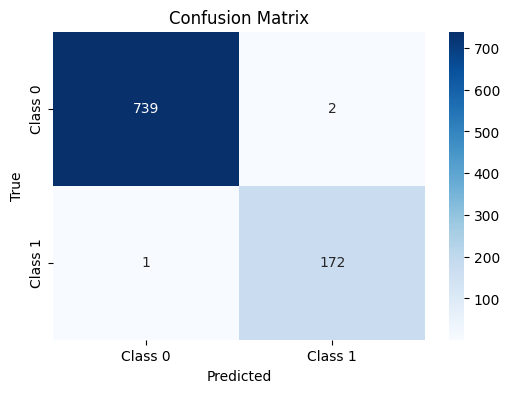

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_val_lstm = X_val_fold.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1])

    # Build the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
    model_lstm.add(Dropout(0.5))
    model_lstm.add(LSTM(32))
    model_lstm.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history=model_lstm.fit(X_train_lstm, y_train_fold, epochs=15, batch_size=16,
                   validation_data=(X_val_lstm, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    X_val_lstm = X_val_fold.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1])
    y_pred = model_lstm.predict(X_val_lstm)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")
cm = confusion_matrix(y_val_fold, y_pred)
# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


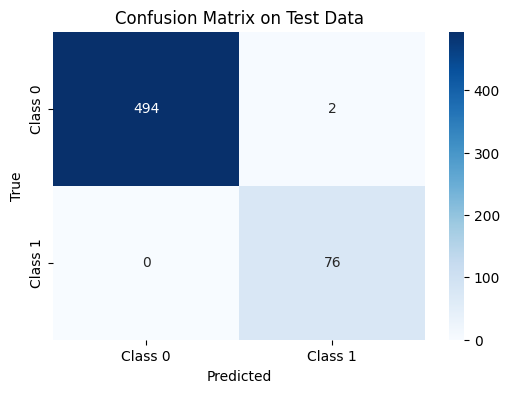

Accuracy: 0.9965
Precision: 0.9744
Recall: 1.0000
F1-Score: 0.9870
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       0.97      1.00      0.99        76

    accuracy                           1.00       572
   macro avg       0.99      1.00      0.99       572
weighted avg       1.00      1.00      1.00       572



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Reshape test data for LSTM
X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])

# Predict on test data
y_test_pred = model_lstm.predict(X_test_lstm)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(classification_report(y_test, y_test_pred))

XGBoost without any metaheuristic algorithm

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9967, Precision: 0.9981, Recall: 0.9879, F1: 0.9929
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9913, Precision: 0.9803, Recall: 0.9897, F1: 0.9849
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9967, Precision: 0.9980, Recall: 0.9905, F1: 0.9942
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9960, Recall: 0.9960, F1: 0.9960
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9942, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9961 ± 0.00
Precision: 0.9942 ± 0.01
Recall: 0.9917 ± 0.00
F1 Score: 0.9929 ± 0.00


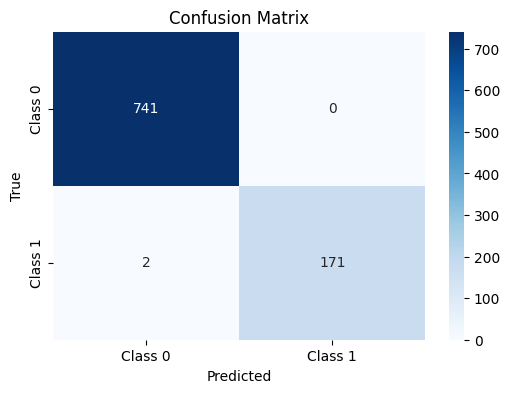

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build the XGBoost model
    model_xgb = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Train the model
    model_xgb.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred = model_xgb.predict(X_val_fold)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Get the confusion matrix for the last fold
cm = confusion_matrix(y_val_fold, y_pred)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


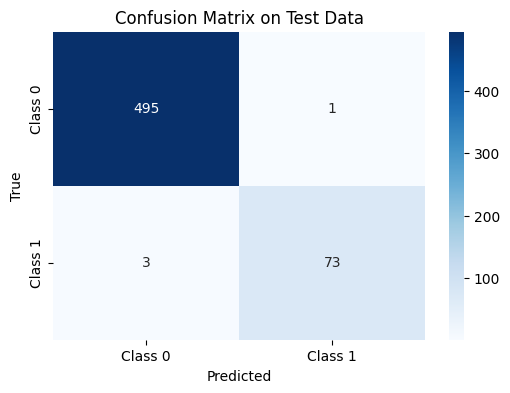

Accuracy: 0.9930
Precision: 0.9865
Recall: 0.9605
F1-Score: 0.9733
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       496
           1       0.99      0.96      0.97        76

    accuracy                           0.99       572
   macro avg       0.99      0.98      0.98       572
weighted avg       0.99      0.99      0.99       572



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])

# Predict on test data
y_test_pred = model_xgb.predict(X_test_embeddings_numpy)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(classification_report(y_test, y_test_pred))

CNN without any metaheuristic algorithm

Fold 1
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.9945, Precision: 0.9933, Recall: 0.9832, F1: 0.9882
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9880, Precision: 0.9716, Recall: 0.9878, F1: 0.9794
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.9956, Precision: 0.9948, Recall: 0.9898, F1: 0.9923
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9933, F1: 0.9960
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9989, Precision: 0.9993, Recall: 0.9971, F1: 0.9982

Cross-Validation Results:
Accuracy: 0.9950 ± 0.00
Precision: 0.9915 ± 0.01
Recall: 0.9903 ± 0.00
F1 Score: 0.9908 ± 0.01


Text(0.5, 1.0, 'Confusion Matrix')

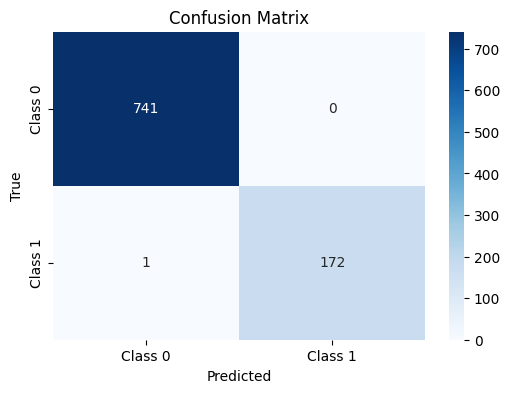

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Reshape data for CNN (samples, features, channels)
    X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
    X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)

    # Build the CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model_cnn.add(Dropout(0.3))
    model_cnn.add(Conv1D(64, kernel_size=3, activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(32, activation='relu'))
    model_cnn.add(Dropout(0.3))
    model_cnn.add(Dense(1, activation='sigmoid'))   # Binary classification

    # Compile the model
    model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model_cnn.fit(X_train_cnn, y_train_fold, epochs=15, batch_size=16,
                            validation_data=(X_val_cnn, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_cnn.predict(X_val_cnn)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


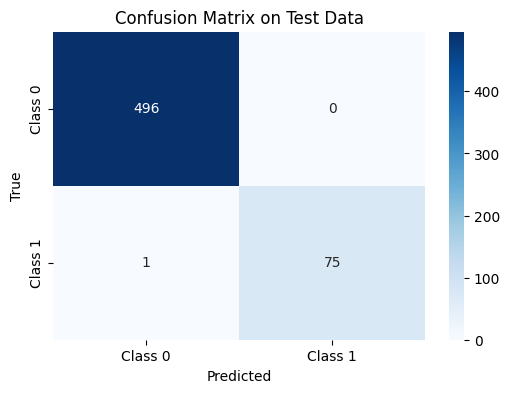

Accuracy: 0.9983
Precision: 1.0000
Recall: 0.9868
F1-Score: 0.9934


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_cnn = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], X_test_embeddings_numpy.shape[1], 1)
#X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)
# Predict on test data
y_test_pred = model_cnn.predict(X_test_cnn)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

TLBO

In [ ]:
# WITH LOGISTIC REGRESSION

!pip install tensorflow
!pip install keras
!pip install mealpy
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from mealpy import TLO,FloatVar
from mealpy.utils.problem import FloatVar

#from mealpy.evaluation import Fitness
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#y_train=y_train.values
# Step 3: Apply TLBO for Feature Selection
def fitness_function(solution):
    # Apply feature selection based on the solution vector (masking)
    selected_features = X_train_embeddings_numpy[:, solution > 0.5]  # Select features based on the solution vector
    # Using a simple classification-based fitness function for demonstration
    if selected_features.shape[1] == 0:  # If no feature is selected, return a very high fitness (bad solution)
        return 1e6
    # A dummy fitness function using a classifier for simplicity (you can replace with proper logic)
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)
    model.fit(selected_features, y_train)
    return -model.score(selected_features, y_train)  # Minimize negative accuracy (higher accuracy is better)

# Define the problem for TLBO
problem_dict = {
    "bounds": FloatVar(lb=(0,) * X_train_embeddings_numpy.shape[1], ub=(1,) * X_train_embeddings_numpy.shape[1], name="delta"),
    "minmax": "min",  # Minimize fitness
    "obj_func": fitness_function
}

# Initialize and solve TLBO
model_tlbo = TLO.DevTLO(epoch=20, pop_size=50, save_population=True)
g_best = model_tlbo.solve(problem_dict)

# Print the best solution and fitness
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model_tlbo.g_best.solution}, Fitness: {model_tlbo.g_best.target.fitness}")

INFO:mealpy.human_based.TLO.DevTLO:Solving single objective optimization problem.
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 1, Current best: -0.994752951464801, Global best: -0.994752951464801, Runtime: 9.49088 seconds
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 2, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 11.18423 seconds
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 3, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 7.98975 seconds
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 4, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 9.52388 seconds
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 5, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 9.95300 seconds
INFO:mealpy.human_based.TLO.DevTLO:>>>Problem: P, Epoch: 6, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 11.48181 se

Solution: [0.23224787 0.71459041 0.89771662 0.41148364 0.80901224 0.60285489
 0.40713995 0.66726234 0.72858422 0.3877265  0.86275303 0.5461918
 0.53569514 0.39701576 0.23359109 0.63847339 0.71782171 0.41882883
 0.86609576 0.3834924  0.46985476 0.7679327  0.69674952 0.43129033
 0.14042097 0.52794555 0.75056704 0.50557727 0.46272233 0.30346702
 0.35788318 0.36723172 0.76205102 0.31126701 0.19459256 0.72269767
 0.6909958  0.19541715 0.90607445 0.3993837  0.91102689 0.85459498
 0.4888633  0.42569526 0.56637876 0.59134302 0.16570678 0.20617111
 0.55795525 0.89148081 0.35120404 0.73424401 0.85672861 0.37139322
 0.59347251 0.72449744 0.63386248 0.32671461 0.49032559 0.3182604
 0.71918695 0.19796735 0.4928147  0.63020541 0.5543693  0.8597567
 0.457511   0.42923664 0.40745901 0.13540891 0.93883423 0.34811487
 0.67505387 0.1797142  0.27871648 0.79953569 0.52161911 0.26687258
 0.79957228 0.05882334 0.58434367 0.35159771 0.55964343 0.67392069
 0.18406139 0.44474626 0.49561811 0.43578611 0.78079329

LSTM WITH TLBO

Fold 1
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9967, Precision: 0.9947, Recall: 0.9913, F1: 0.9930
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.9869, Precision: 0.9707, Recall: 0.9846, F1: 0.9775
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9945, Precision: 0.9941, Recall: 0.9867, F1: 0.9904
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.9945, Precision: 0.9940, Recall: 0.9860, F1: 0.9900
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9942, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9941 ± 0.00
Precision: 0.9904 ± 0.01
Recall: 0.9886 ± 0.00
F1 Score: 0.9894 ± 0.01


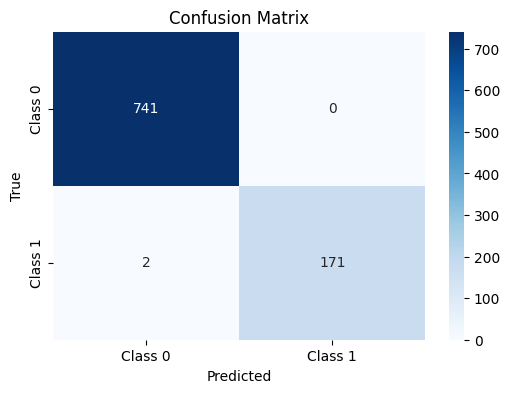

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # **Feature selection change**
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # **Feature selection change**

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_val_lstm = X_val_fold.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1])

    # Build the LSTM model
    model_lstm_tlbo = Sequential()
    model_lstm_tlbo.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
    model_lstm_tlbo.add(Dropout(0.5))
    model_lstm_tlbo.add(LSTM(32))
    model_lstm_tlbo.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_lstm_tlbo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_tlbo=model_lstm_tlbo.fit(X_train_lstm, y_train_fold, epochs=15, batch_size=16,
                   validation_data=(X_val_lstm, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_lstm_tlbo.predict(X_val_lstm)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


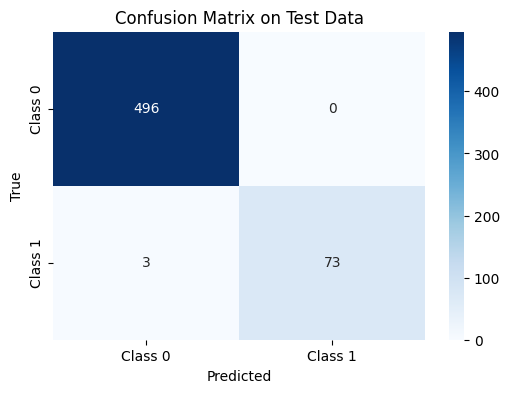

Accuracy: 0.9948
Precision: 1.0000
Recall: 0.9605
F1-Score: 0.9799


In [ ]:
# Apply feature selection to test data using g_best.solution
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]

# Reshape test data for LSTM (samples, timesteps, features)
X_test_lstm = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])



# Predict on test data
y_test_pred = model_lstm_tlbo.predict(X_test_lstm)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are the true and predicted labels:
print(classification_report(y_test, y_test_pred, target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       496
        Spam       1.00      0.96      0.98        76

    accuracy                           0.99       572
   macro avg       1.00      0.98      0.99       572
weighted avg       0.99      0.99      0.99       572



XGBOOST+TLBO

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9967, Precision: 0.9981, Recall: 0.9879, F1: 0.9929
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9913, Precision: 0.9803, Recall: 0.9897, F1: 0.9849
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9956, Precision: 0.9974, Recall: 0.9873, F1: 0.9923
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9945, Precision: 0.9968, Recall: 0.9833, F1: 0.9899
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9942, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9952 ± 0.00
Precision: 0.9942 ± 0.01
Recall: 0.9885 ± 0.00
F1 Score: 0.9913 ± 0.00


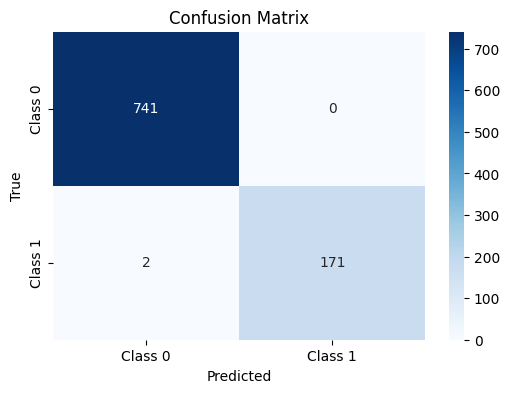

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to apply TLBO-based feature selection
def tlbo_feature_selection(X_train, g_best_solution, threshold=0.5):
    return X_train[:, g_best_solution > threshold]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold_selected = tlbo_feature_selection(X_train_fold, g_best.solution)
    X_val_fold_selected = tlbo_feature_selection(X_val_fold, g_best.solution)

    # Build the XGBoost model
    model_xgb = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Train the model
    model_xgb.fit(X_train_fold_selected, y_train_fold)

    # Predict on the validation set
    y_pred = model_xgb.predict(X_val_fold_selected)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix for the last fold
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


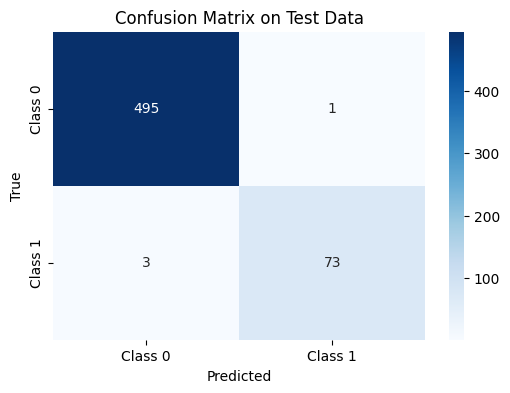

Accuracy: 0.9930
Precision: 0.9865
Recall: 0.9605
F1-Score: 0.9733


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]
# Predict on test data
y_test_pred = model_xgb.predict(X_test_selected)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


CNN_TLBO

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.9956, Precision: 0.9907, Recall: 0.9907, F1: 0.9907
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9891, Precision: 0.9765, Recall: 0.9859, F1: 0.9812
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9956, Precision: 0.9948, Recall: 0.9898, F1: 0.9923
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9933, F1: 0.9960
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9989, Precision: 0.9993, Recall: 0.9971, F1: 0.9982

Cross-Validation Results:
Accuracy: 0.9954 ± 0.00
Precision: 0.9920 ± 0.01
Recall: 0.9914 ± 0.00
F1 Score: 0.9917 ± 0.01


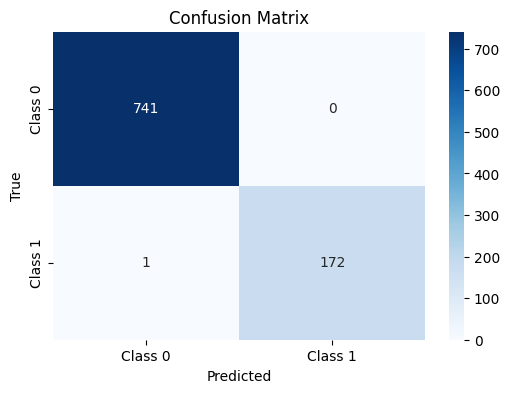

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # **Feature selection change**
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # **Feature selection change**

    # Reshape data for CNN (samples, timesteps, features)
    X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
    X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)

    # Build the CNN model
    model_cnn_tlbo = Sequential()
    model_cnn_tlbo.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model_cnn_tlbo.add(Dropout(0.3))
    model_cnn_tlbo.add(Conv1D(64, kernel_size=3, activation='relu'))
    model_cnn_tlbo.add(MaxPooling1D(pool_size=2))
    model_cnn_tlbo.add(Flatten())
    model_cnn_tlbo.add(Dense(32, activation='relu'))
    model_cnn_tlbo.add(Dropout(0.3))
    model_cnn_tlbo.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_cnn_tlbo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_cnn_tlbo = model_cnn_tlbo.fit(X_train_cnn, y_train_fold, epochs=15, batch_size=16,
                                           validation_data=(X_val_cnn, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_cnn_tlbo.predict(X_val_cnn)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


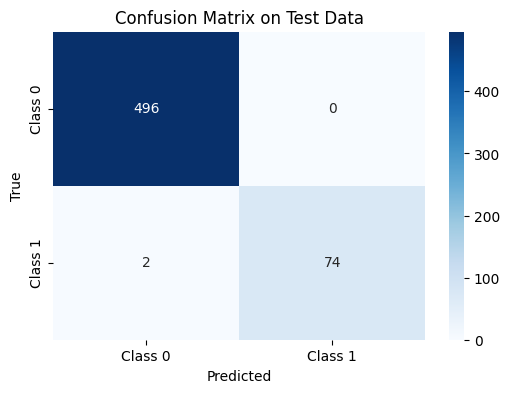

Accuracy: 0.9965
Precision: 1.0000
Recall: 0.9737
F1-Score: 0.9867


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]  # Feature selection based on training data
# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
#X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)
# Predict on test data
y_test_pred = model_cnn_tlbo.predict(X_test_cnn)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")




In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are the true and predicted labels:
print(classification_report(y_test, y_test_pred, target_names=['Not Spam', 'Spam']))


              precision    recall  f1-score   support

    Not Spam       1.00      1.00      1.00       496
        Spam       1.00      0.97      0.99        76

    accuracy                           1.00       572
   macro avg       1.00      0.99      0.99       572
weighted avg       1.00      1.00      1.00       572



In [ ]:
selected_features_tlbo = X_train_embeddings_numpy[:, g_best.solution > 0.5]
selected_features_tlbo.shape

(4574, 50)

In [ ]:
import gc
gc.collect()


265579

PSO IMPLEMENTATION

In [ ]:
!pip install mealpy
import numpy as np

from mealpy import FloatVar, PSO
from sklearn.linear_model import LogisticRegression

# Define the PSO-based Fitness Function (Feature Selection)
def fitness_function(solution):
    # Apply feature selection based on the solution vector (masking)
    selected_features = X_train_embeddings_numpy[:, solution > 0.5]  # Select features based on the solution vector
    if selected_features.shape[1] == 0:  # If no feature is selected, return a very high fitness (bad solution)
        return 1e6
    # A dummy fitness function using a classifier for simplicity (you can replace with proper logic)
    model = LogisticRegression(max_iter=1000)
    model.fit(selected_features, y_train)
    return -model.score(selected_features, y_train)  # Minimize negative accuracy (higher accuracy is better)

# Define the PSO problem (Feature Selection)
problem_dict = {
    "bounds": FloatVar(lb=(0,) * X_train_embeddings_numpy.shape[1], ub=(1,) * X_train_embeddings_numpy.shape[1], name="delta"),
    "minmax": "min",  # Minimize fitness
    "obj_func": fitness_function
}

# Initialize and solve PSO (using AIW_PSO as the PSO variant)

model_pso = PSO.AIW_PSO(epoch=20, pop_size=50, c1=2.05, c2=4.0, alpha=0.95)  # PSO parameters
g_best = model_pso.solve(problem_dict)

# Print the best solution and fitness found by PSO
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model_pso.g_best.solution}, Fitness: {model_pso.g_best.target.fitness}")



INFO:mealpy.swarm_based.PSO.AIW_PSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 1, Current best: -0.994752951464801, Global best: -0.994752951464801, Runtime: 2.33877 seconds
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 2, Current best: -0.995190205509401, Global best: -0.995190205509401, Runtime: 3.58775 seconds
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 3, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 2.40822 seconds
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 4, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 1.52827 seconds
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 5, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 1.49916 seconds
INFO:mealpy.swarm_based.PSO.AIW_PSO:>>>Problem: P, Epoch: 6, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 1.49120

Solution: [0.78457487 0.85832221 0.37327948 0.32383759 0.64705525 0.57368688
 0.62043907 0.89905684 0.85180154 0.21908899 0.83272237 0.65169904
 0.41428977 0.38871296 0.12671211 0.10925031 0.81552341 0.26130944
 0.9406924  0.893056   0.85582493 0.20917969 0.12778376 0.79026337
 0.09982318 0.23611664 0.34553636 0.16801848 0.84437825 0.96912644
 0.311565   0.43651568 0.64732257 0.24693108 0.46299192 0.40784093
 0.22691309 0.50376339 0.900213   0.47168308 0.46165113 0.97507322
 0.43715517 0.23333955 0.74581408 0.24238741 0.1784405  0.26628463
 0.6579512  0.80891929 0.82409102 0.41282372 0.71568911 0.12964099
 0.93594302 0.63108774 0.01521771 0.95354421 0.56701371 0.41452918
 0.03398509 0.20491374 0.15380946 0.71837303 0.27986364 0.67982499
 0.6606196  0.54067807 0.19929616 0.06669967 0.67212093 0.89439616
 0.65233732 0.25288937 0.45246064 0.98044871 0.54862799 0.38114378
 0.58759057 0.03028705 0.39338225 0.40283684 0.74125379 0.81984553
 0.30499395 0.09503708 0.25028606 0.18996142 0.29267

In [ ]:
# Get selected features using the solution from PSO
selected_features_pso = X_train_embeddings_numpy[:, g_best.solution > 0.5]
# Get selected features using the solution from PSO
selected_features_pso

array([[-0.22722918,  0.42931759,  0.12528707, ...,  0.78812331,
        -0.25657704, -0.21688329],
       [-0.96220076,  0.85851252,  0.95189643, ...,  0.70373654,
        -0.59708178, -0.35567343],
       [ 0.15147333,  0.44490033,  0.27288637, ..., -0.08443718,
        -0.2850157 , -0.02741162],
       ...,
       [ 0.05769406,  0.68035263,  0.18883686, ...,  0.62220192,
        -0.1200434 , -0.08976702],
       [-0.59869283,  0.09179741,  0.58324236, ...,  0.45982638,
        -0.50245714, -0.44014269],
       [-0.04546762, -0.19494109,  0.29883188, ...,  0.34157342,
        -0.06592704, -0.4799014 ]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso  # Example PSO library
import shap  # For Shapley value explanation

# Example objective function
def objective_function(x):
    return np.sum(x**2)  # Example: minimize the sum of squares

# PSO optimization
lb = np.array([-5, -5])  # Lower bounds of the search space
ub = np.array([5, 5])    # Upper bounds of the search space

# Run PSO
best_position, best_value = pso(objective_function, lb, ub, swarmsize=50, maxiter=100)

# Explain the best solution using Shapley values (example)
explainer = shap.KernelExplainer(objective_function, best_position)
shap_values = explainer.shap_values(best_position)

# Visualize Shapley values
shap.summary_plot(shap_values, best_position)

# Plot particle movements in the search space
plt.scatter(best_position[0], best_position[1], c='r', label="Best Solution")
plt.title("PSO Optimization Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
selected_features_pso.shape

(4574, 48)

Global Best Fitness - PSO Values: [-0.994752951464801, -0.995190205509401, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009]
Global Best Fitness - TLBO Values: [-0.994752951464801, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009]


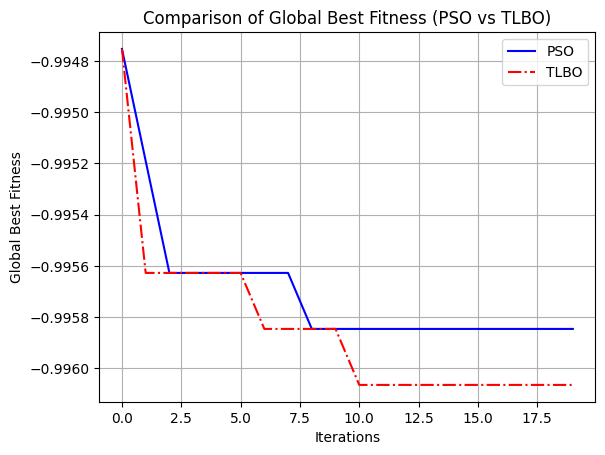

Exploration vs Exploitation - PSO Values: [ 97.62306076 100.          98.70099546  96.21338635  95.25310146]
Exploration vs Exploitation - TLBO Values: [100.          94.88895044  88.86790026  87.06227336  80.86402734]


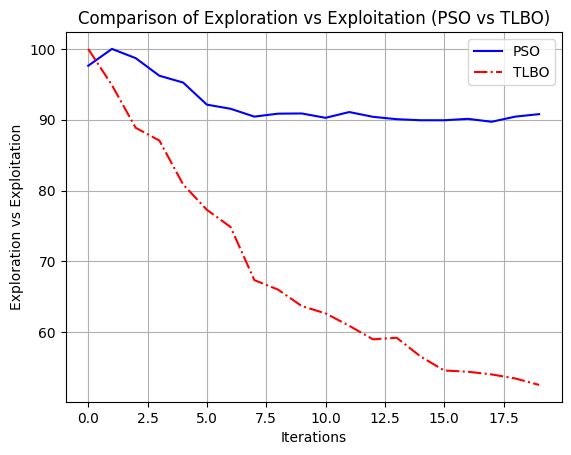

Diversity - PSO Values: [0.20255686713611185, 0.20748874862290623, 0.20479346036856078, 0.19963195134555034, 0.19763946823864084]
Diversity - TLBO Values: [0.22881926216275927, 0.21712419628149351, 0.20334687366783769, 0.19921525152382039, 0.18503247071997223]


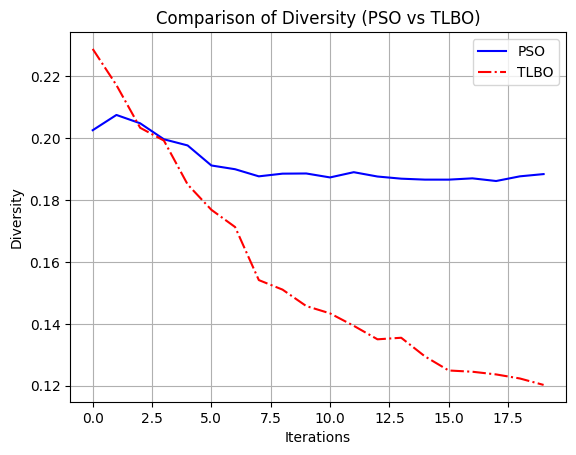

In [ ]:
import matplotlib.pyplot as plt

# Metrics to compare
metrics = [
    ("Global Best Fitness", "list_global_best_fit", "gbfc"),
    #("Local Best Fitness", "list_local_best_fit", "lbfc"),
    ("Exploration vs Exploitation", "list_exploration", "eec"),
    ("Diversity", "list_diversity", "dc"),
]

# Assuming model_pso, model_ga, model_tlbo are the models you're comparing
for metric_name, attribute, filename_suffix in metrics:
    # Get the values for the metric from each model
    pso_values = getattr(model_pso.history, attribute, [])
    # ga_values = getattr(model_ga.history, attribute, [])  # Uncomment if using GA
    tlbo_values = getattr(model_tlbo.history, attribute, [])

    # Print the first few values to check if data exists
    print(f"{metric_name} - PSO Values: {pso_values[:5]}")
    print(f"{metric_name} - TLBO Values: {tlbo_values[:5]}")

    # Create a new figure for each metric
    plt.figure()

    # Plot PSO values if they exist
    if len(pso_values) > 0:
        plt.plot(range(len(pso_values)), pso_values, label="PSO", color="blue", linestyle="-")

    # Plot GA values if they exist
    # if len(ga_values) > 0:
    #     plt.plot(range(len(ga_values)), ga_values, label="GA", color="green", linestyle="--")

    # Plot TLBO values if they exist
    if len(tlbo_values) > 0:
        plt.plot(range(len(tlbo_values)), tlbo_values, label="TLBO", color="red", linestyle="-.")

    # Customize plot
    plt.xlabel("Iterations")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} (PSO vs TLBO)")  # Adjust the title if using GA
    plt.legend()
    plt.grid(True)

    # Save the plot with the appropriate filename
   # plt.savefig(f"images/comparison_{filename_suffix}.png")
    plt.show()  # Display the plot

LSTM+PSO

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9945, Precision: 0.9933, Recall: 0.9832, F1: 0.9882
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Accuracy: 0.9858, Precision: 0.9764, Recall: 0.9740, F1: 0.9752
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9945, Precision: 0.9917, Recall: 0.9892, F1: 0.9904
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy: 0.9956, Precision: 0.9947, Recall: 0.9893, F1: 0.9920
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9956, Precision: 0.9929, Recall: 0.9929, F1: 0.9929

Cross-Validation Results:
Accuracy: 0.9932 ± 0.00
Precision: 0.9898 ± 0.01
Recall: 0.9857 ± 0.01
F1 Score: 0.9877 ± 0.01


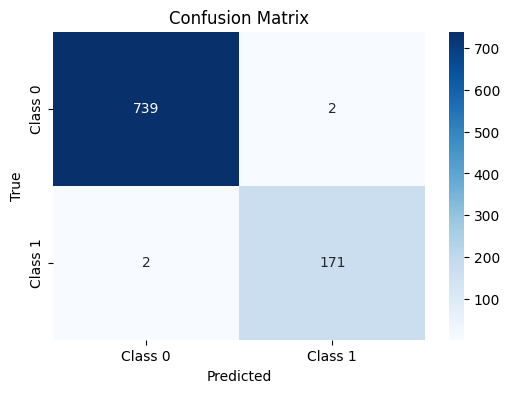

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # Feature selection change
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # Feature selection change

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_val_lstm = X_val_fold.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1])

    # Build the LSTM model (model_lstm_pso)
    model_lstm_pso = Sequential()
    model_lstm_pso.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
    model_lstm_pso.add(Dropout(0.5))
    model_lstm_pso.add(LSTM(32))
    model_lstm_pso.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_lstm_pso.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_pso=model_lstm_pso.fit(X_train_lstm, y_train_fold, epochs=15, batch_size=16,
                       validation_data=(X_val_lstm, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_lstm_pso.predict(X_val_lstm)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix (using the last fold for visualization)
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


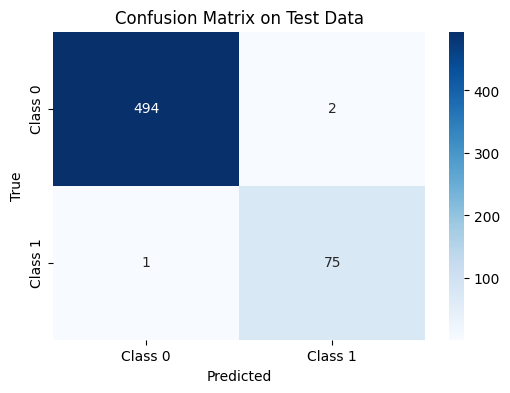

Accuracy: 0.9948
Precision: 0.9740
Recall: 0.9868
F1-Score: 0.9804


In [ ]:
# Apply feature selection to test data using g_best.solution
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]

# Reshape test data for LSTM (samples, timesteps, features)
X_test_lstm = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])


# Predict on test data
y_test_pred = model_lstm_pso.predict(X_test_lstm)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



XGBoost +PSO

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9919, F1: 0.9953
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9945, Precision: 0.9917, Recall: 0.9892, F1: 0.9905
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9945, Precision: 0.9967, Recall: 0.9842, F1: 0.9903
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9934, Precision: 0.9855, Recall: 0.9907, F1: 0.9881
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9942, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9956 ± 0.00
Precision: 0.9943 ± 0.01
Recall: 0.9901 ± 0.00
F1 Score: 0.9921 ± 0.00


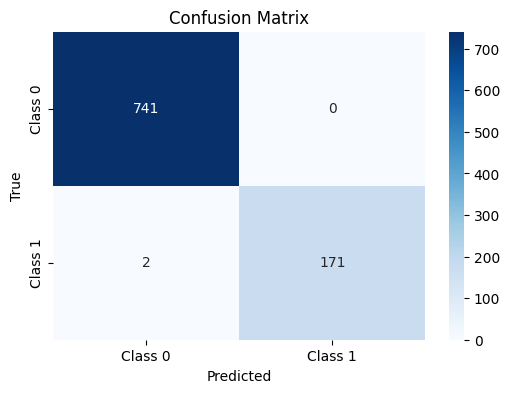

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to apply TLBO-based feature selection
def tlbo_feature_selection(X_train_embeddings_numpy, g_best_solution, threshold=0.5):
    return X_train_embeddings_numpy[:, g_best_solution > threshold]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold_selected = tlbo_feature_selection(X_train_fold, g_best.solution)
    X_val_fold_selected = tlbo_feature_selection(X_val_fold, g_best.solution)

    # Build the XGBoost model
    model_xgb_pso = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Train the model
    model_xgb_pso.fit(X_train_fold_selected, y_train_fold)

    # Predict on the validation set
    y_pred = model_xgb_pso.predict(X_val_fold_selected)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix for the last fold
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


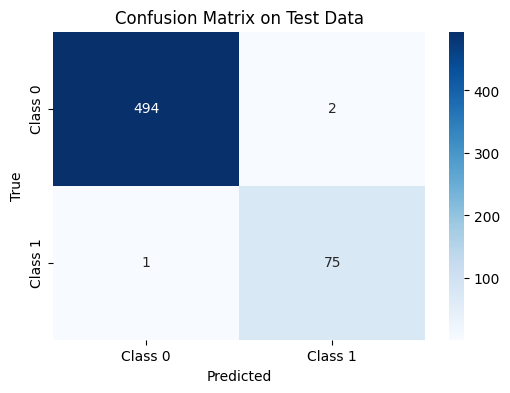

Accuracy: 0.9948
Precision: 0.9740
Recall: 0.9868
F1-Score: 0.9804


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]
# Predict on test data
y_test_pred = model_xgb_pso.predict(X_test_selected)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


CNN+ PSO

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9956, Precision: 0.9940, Recall: 0.9873, F1: 0.9906
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9934, Precision: 0.9863, Recall: 0.9911, F1: 0.9886
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9989, Precision: 0.9993, Recall: 0.9968, F1: 0.9981
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9933, F1: 0.9960
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.9989, Precision: 0.9993, Recall: 0.9971, F1: 0.9982

Cross-Validation Results:
Accuracy: 0.9969 ± 0.00
Precision: 0.9955 ± 0.01
Recall: 0.9931 ± 0.00
F1 Score: 0.9943 ± 0.00


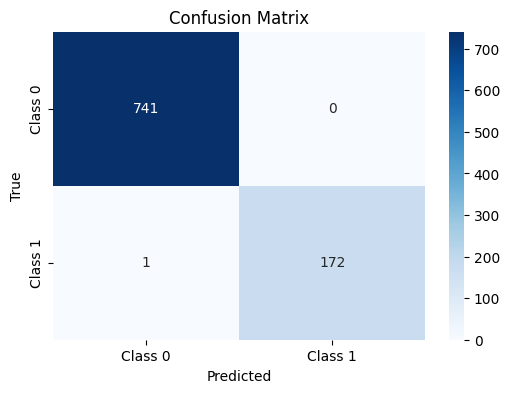

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # Feature selection change
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # Feature selection change

    # Reshape data for CNN (samples, timesteps, features)
    X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
    X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)

    # Build the CNN model
    model_cnn_pso = Sequential()
    model_cnn_pso.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model_cnn_pso.add(Dropout(0.3))
    model_cnn_pso.add(Conv1D(64, kernel_size=3, activation='relu'))
    model_cnn_pso.add(MaxPooling1D(pool_size=2))
    model_cnn_pso.add(Flatten())
    model_cnn_pso.add(Dense(32, activation='relu'))
    model_cnn_pso.add(Dropout(0.3))
    model_cnn_pso.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_cnn_pso.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_pso = model_cnn_pso.fit(X_train_cnn, y_train_fold, epochs=15, batch_size=16,
                                    validation_data=(X_val_cnn, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_cnn_pso.predict(X_val_cnn)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix (using the last fold for visualization)
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
X_train_fold

array([[-0.22722918,  0.42931759,  0.12528707, ...,  0.78812331,
        -0.25657704, -0.21688329],
       [-0.96220076,  0.85851252,  0.95189643, ...,  0.70373654,
        -0.59708178, -0.35567343],
       [ 0.15147333,  0.44490033,  0.27288637, ..., -0.08443718,
        -0.2850157 , -0.02741162],
       ...,
       [ 0.05769406,  0.68035263,  0.18883686, ...,  0.62220192,
        -0.1200434 , -0.08976702],
       [-0.59869283,  0.09179741,  0.58324236, ...,  0.45982638,
        -0.50245714, -0.44014269],
       [-0.04546762, -0.19494109,  0.29883188, ...,  0.34157342,
        -0.06592704, -0.4799014 ]])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


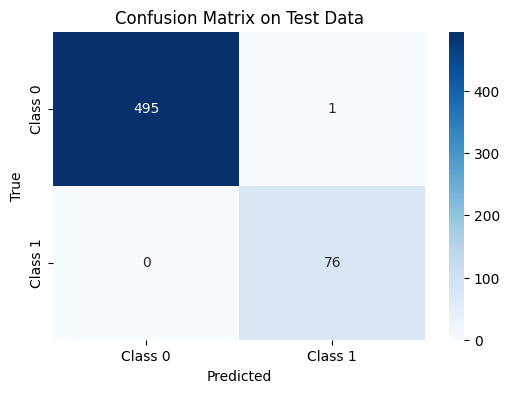

Accuracy: 0.9983
Precision: 0.9870
Recall: 1.0000
F1-Score: 0.9935


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]  # Feature selection based on training data
# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
#X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)
# Predict on test data
y_test_pred = model_cnn_pso.predict(X_test_cnn)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")





SELECTED 2 TOGETHER

In [ ]:
# Get features selected by both TLBO and PSO (union of both)
selected_features_combined = np.column_stack((
selected_features_tlbo , selected_features_pso))


In [ ]:
import gc
gc.collect()

126033

GWO + CODES

In [ ]:
# Import required libraries
import numpy as np
from mealpy import FloatVar, GWO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the objective (fitness) function for GWO
def fitness_function(solution):
    # Apply feature selection based on the solution vector (masking)
    selected_features = X_train_embeddings_numpy[:, solution > 0.5]  # Select features based on the solution vector

    # If no features are selected, return a very high fitness (bad solution)
    if selected_features.shape[1] == 0:
        return 1e6

    # A dummy fitness function using Logistic Regression for simplicity (you can replace with more complex logic)
    model = LogisticRegression(max_iter=1000)
    model.fit(selected_features, y_train)

    # Return negative accuracy for minimization (higher accuracy is better)
    return -model.score(selected_features, y_train)

# Define the problem for GWO (similar to TLBO approach)
problem_dict = {
    "bounds": FloatVar(lb=(0,) * X_train_embeddings_numpy.shape[1], ub=(1,) * X_train_embeddings_numpy.shape[1], name="delta"),
    "minmax": "min",  # Minimize fitness
    "obj_func": fitness_function
}

# Initialize and solve the GWO optimization
model_gwo = GWO.GWO_WOA(epoch=20, pop_size=50,alpha=2.8,  # Adjust alpha (if applicable, exploration coefficient)
    beta=0.8,   # Adjust beta (if applicable, exploitation coefficient)
    delta=0.3,)
g_best = model_gwo.solve(problem_dict)

# Print the best solution and fitness
print(f"Best Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Best Solution: {model_gwo.g_best.solution}, Fitness: {model_gwo.g_best.target.fitness}")

# You can also use the selected features to train your model on the test data
#selected_features_test = X_test_embeddings_numpy[:, g_best.solution > 0.5]  # Apply selected features on test data

# You can then train a classifier on these selected features (similar to TLBO)
#model = LogisticRegression(max_iter=1000)
#model.fit(selected_features_test, y_test)

# Evaluate the model performance on test data
#y_test_pred = model.predict(selected_features_test)
#accuracy = accuracy_score(y_test, y_test_pred)

#print(f"Test Accuracy: {accuracy:.4f}")


INFO:mealpy.swarm_based.GWO.GWO_WOA:Solving single objective optimization problem.
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 1, Current best: -0.994752951464801, Global best: -0.994752951464801, Runtime: 5.00207 seconds
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 2, Current best: -0.994971578487101, Global best: -0.994971578487101, Runtime: 4.60162 seconds
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 3, Current best: -0.9956274595540009, Global best: -0.9956274595540009, Runtime: 6.94028 seconds
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 4, Current best: -0.9958460865763008, Global best: -0.9958460865763008, Runtime: 6.87682 seconds
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 5, Current best: -0.9958460865763008, Global best: -0.9958460865763008, Runtime: 2.96514 seconds
INFO:mealpy.swarm_based.GWO.GWO_WOA:>>>Problem: P, Epoch: 6, Current best: -0.9958460865763008, Global best: -0.9958460865763008, Runtime: 2.99971

Best Solution: [0.51773135 0.71826255 0.07749604 0.28384729 0.25138668 0.66161754
 0.42229512 0.52315694 0.         0.72032348 0.74190712 0.45119448
 1.         0.35043319 0.237925   0.54552027 0.31128211 0.05059449
 0.81667692 0.01376577 0.82458732 0.35201092 0.43028069 0.1853735
 0.40500485 0.19510342 0.16171887 0.54066715 0.43248634 0.43738608
 1.         0.54201773 0.58778483 0.3795797  0.09323001 0.50839288
 0.02110663 0.63781536 0.55097878 0.32667243 0.78103443 0.84242402
 0.62074661 0.49835715 0.33368725 0.50659741 0.90344612 0.32933139
 0.28479686 0.26153855 0.6411639  0.9364396  0.14626197 0.08309434
 0.79320476 0.57175847 0.39291157 0.04105522 1.         0.5752996
 0.8469558  0.9666933  0.64812532 0.58248838 0.16438913 0.84873183
 0.72906634 0.24322274 0.01530215 0.55084809 0.22862605 0.51224062
 0.73205447 0.45195608 0.25142088 0.4813136  0.08109483 0.09805955
 0.61285566 0.34872837 0.97211243 0.         0.52700222 0.48852093
 1.         0.28651998 0.62887834 0.43507777 0.37

In [ ]:
# Get selected features using the solution from PSO
selected_features_gwo = X_train_embeddings_numpy[:, g_best.solution > 0.5]
# Get selected features using the solution from PSO
selected_features_gwo

array([[-0.22722918,  0.42931759,  0.334075  , ..., -0.54579777,
         0.61039358, -0.25657704],
       [-0.96220076,  0.85851252,  0.68857455, ..., -0.76911986,
         0.13332403, -0.59708178],
       [ 0.15147333,  0.44490033,  0.19963539, ..., -0.01775123,
         0.30788526, -0.2850157 ],
       ...,
       [ 0.05769406,  0.68035263,  0.38612497, ..., -0.2081732 ,
         0.42299709, -0.1200434 ],
       [-0.59869283,  0.09179741,  0.45032632, ..., -0.55458772,
        -0.06977686, -0.50245714],
       [-0.04546762, -0.19494109,  0.08753587, ..., -0.01012158,
        -0.21179534, -0.06592704]])

Global Best Fitness - PSO Values: [-0.994752951464801, -0.995190205509401, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009]
Global Best Fitness - TLBO Values: [-0.994752951464801, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009, -0.9956274595540009]
Global Best Fitness - GWO Values: [-0.994752951464801, -0.994971578487101, -0.9956274595540009, -0.9958460865763008, -0.9958460865763008]


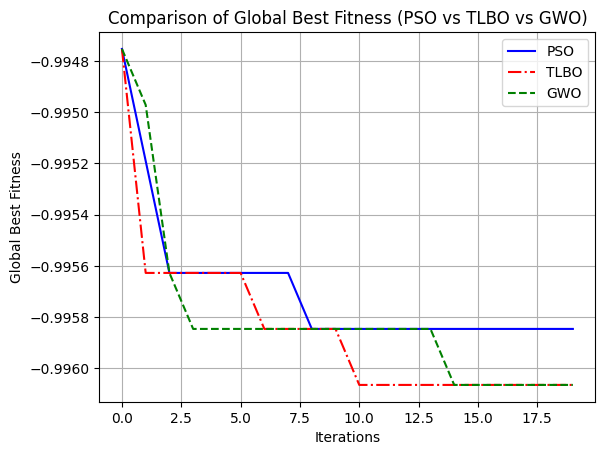

Exploration vs Exploitation - PSO Values: [ 97.62306076 100.          98.70099546  96.21338635  95.25310146]
Exploration vs Exploitation - TLBO Values: [100.          94.88895044  88.86790026  87.06227336  80.86402734]
Exploration vs Exploitation - GWO Values: [100.          91.07699097  86.22603116  78.77587652  74.41040138]


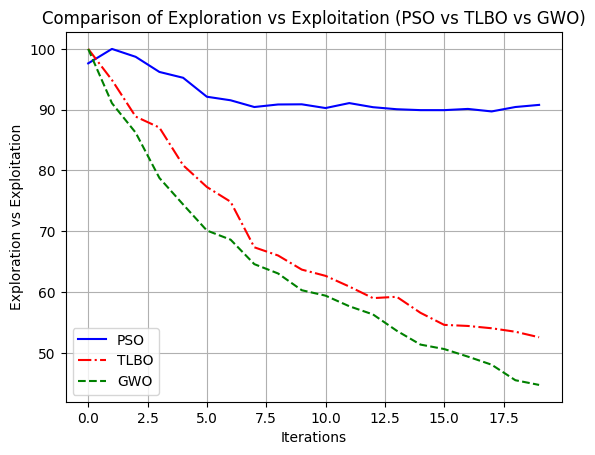

Diversity - PSO Values: [0.20255686713611185, 0.20748874862290623, 0.20479346036856078, 0.19963195134555034, 0.19763946823864084]
Diversity - TLBO Values: [0.22881926216275927, 0.21712419628149351, 0.20334687366783769, 0.19921525152382039, 0.18503247071997223]
Diversity - GWO Values: [0.22653568973936203, 0.2063218896832686, 0.1953327344321145, 0.178455475212367, 0.16856611599411622]


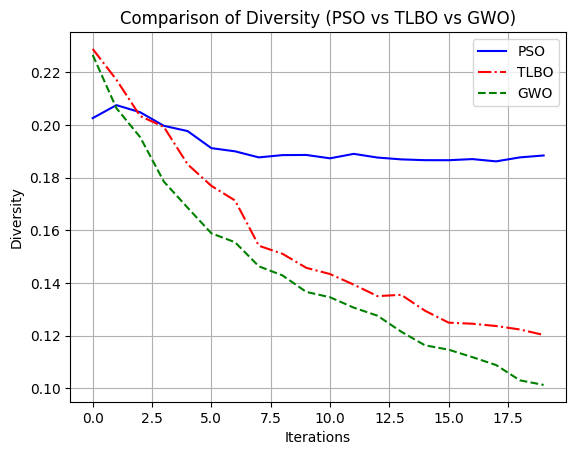

In [ ]:
import matplotlib.pyplot as plt

# Metrics to compare
metrics = [
    ("Global Best Fitness", "list_global_best_fit", "gbfc"),
    ("Exploration vs Exploitation", "list_exploration", "eec"),
    ("Diversity", "list_diversity", "dc"),
]

# Assuming model_pso, model_ga, model_tlbo, model_gwo are the models you're comparing
for metric_name, attribute, filename_suffix in metrics:
    # Get the values for the metric from each model
    pso_values = getattr(model_pso.history, attribute, [])
    tlbo_values = getattr(model_tlbo.history, attribute, [])
    gwo_values = getattr(model_gwo.history, attribute, [])

    # Print the first few values to check if data exists
    print(f"{metric_name} - PSO Values: {pso_values[:5]}")
    print(f"{metric_name} - TLBO Values: {tlbo_values[:5]}")
    print(f"{metric_name} - GWO Values: {gwo_values[:5]}")

    # Create a new figure for each metric
    plt.figure()

    # Plot PSO values if they exist
    if len(pso_values) > 0:
        plt.plot(range(len(pso_values)), pso_values, label="PSO", color="blue", linestyle="-")

    # Plot TLBO values if they exist
    if len(tlbo_values) > 0:
        plt.plot(range(len(tlbo_values)), tlbo_values, label="TLBO", color="red", linestyle="-.")

    # Plot GWO values if they exist
    if len(gwo_values) > 0:
        plt.plot(range(len(gwo_values)), gwo_values, label="GWO", color="green", linestyle="--")

    # Customize plot
    plt.xlabel("Iterations")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} (PSO vs TLBO vs GWO)")  # Adjust title if necessary
    plt.legend()
    plt.grid(True)

    # Save the plot with the appropriate filename
    # plt.savefig(f"images/comparison_{filename_suffix}.png")
    plt.show()  # Display the plot

    # Optionally, you can also save the plots as images
    # plt.savefig(f"comparison_{filename_suffix}.png")

LSTM+GWO

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9945, Precision: 0.9933, Recall: 0.9832, F1: 0.9882
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.9913, Precision: 0.9825, Recall: 0.9873, F1: 0.9849
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9945, Precision: 0.9941, Recall: 0.9867, F1: 0.9904
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9967, Precision: 0.9980, Recall: 0.9900, F1: 0.9940
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9956, Precision: 0.9951, Recall: 0.9907, F1: 0.9928

Cross-Validation Results:
Accuracy: 0.9945 ± 0.00
Precision: 0.9926 ± 0.01
Recall: 0.9876 ± 0.00
F1 Score: 0.9900 ± 0.00


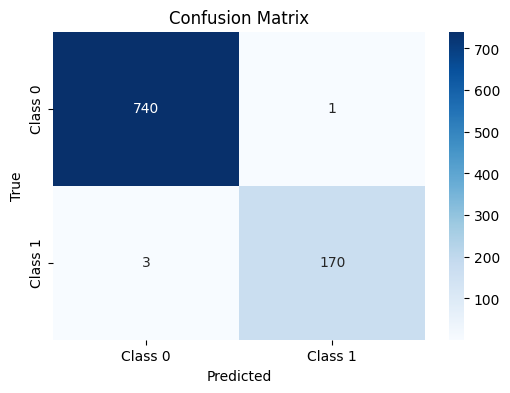

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # **Feature selection change**
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # **Feature selection change**

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_fold.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])
    X_val_lstm = X_val_fold.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1])

    # Build the LSTM model
    model_lstm_gwo = Sequential()
    model_lstm_gwo.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
    model_lstm_gwo.add(Dropout(0.5))
    model_lstm_gwo.add(LSTM(32))
    model_lstm_gwo.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_lstm_gwo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_tlbo=model_lstm_gwo.fit(X_train_lstm, y_train_fold, epochs=15, batch_size=16,
                   validation_data=(X_val_lstm, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_lstm_gwo.predict(X_val_lstm)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


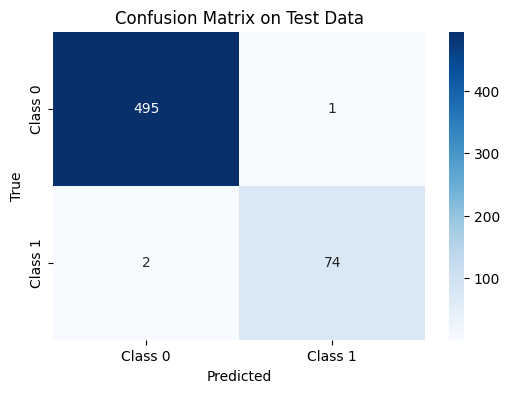

Accuracy: 0.9948
Precision: 0.9867
Recall: 0.9737
F1-Score: 0.9801


In [ ]:
# Apply feature selection to test data using g_best.solution
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]

# Reshape test data for LSTM (samples, timesteps, features)
X_test_lstm = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])



# Predict on test data
y_test_pred = model_lstm_gwo.predict(X_test_lstm)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

XGBOOST+ GWO

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9945, Precision: 0.9867, Recall: 0.9900, F1: 0.9884
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9934, Precision: 0.9840, Recall: 0.9935, F1: 0.9887
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9956, Precision: 0.9974, Recall: 0.9873, F1: 0.9923
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9967, Precision: 0.9953, Recall: 0.9927, F1: 0.9940
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9942, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9956 ± 0.00
Precision: 0.9924 ± 0.01
Recall: 0.9916 ± 0.00
F1 Score: 0.9920 ± 0.00


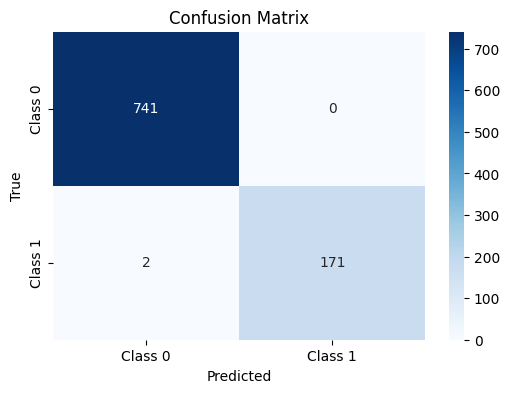

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to apply TLBO-based feature selection
def tlbo_feature_selection(X_train, g_best_solution, threshold=0.5):
    return X_train[:, g_best_solution > threshold]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold_selected = tlbo_feature_selection(X_train_fold, g_best.solution)
    X_val_fold_selected = tlbo_feature_selection(X_val_fold, g_best.solution)

    # Build the XGBoost model
    model_xgb_gwo = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Train the model
    model_xgb_gwo.fit(X_train_fold_selected, y_train_fold)

    # Predict on the validation set
    y_pred = model_xgb_gwo.predict(X_val_fold_selected)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix for the last fold
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

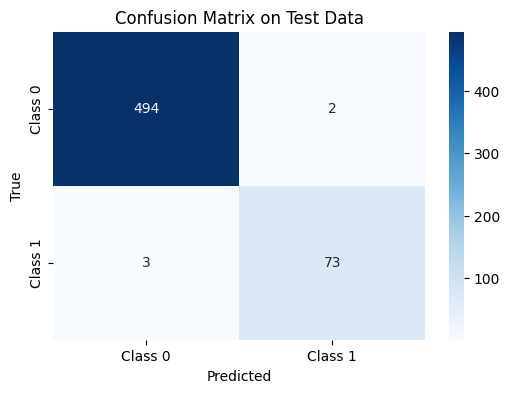

Accuracy: 0.9913
Precision: 0.9733
Recall: 0.9605
F1-Score: 0.9669


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]
# Predict on test data
y_test_pred = model_xgb_gwo.predict(X_test_selected)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Accuracy: 0.9956, Precision: 0.9975, Recall: 0.9839, F1: 0.9905
Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9902, Precision: 0.9795, Recall: 0.9866, F1: 0.9830
Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9934, Precision: 0.9910, Recall: 0.9860, F1: 0.9885
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.9978, Precision: 0.9987, Recall: 0.9933, F1: 0.9960
Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.9967, Precision: 0.9936, Recall: 0.9958, F1: 0.9947

Cross-Validation Results:
Accuracy: 0.9948 ± 0.00
Precision: 0.9920 ± 0.01
Recall: 0.9891 ± 0.00
F1 Score: 0.9905 ± 0.00


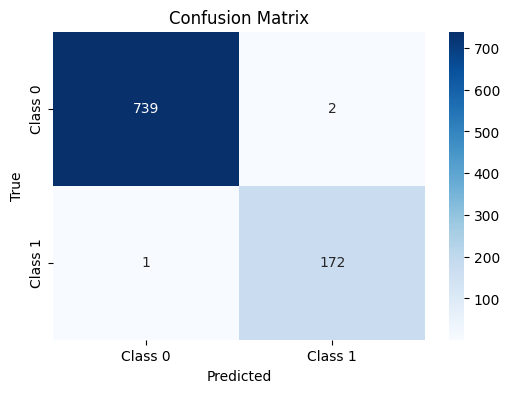

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store metrics across all folds
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Loop through each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train_embeddings_numpy)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Apply feature selection using g_best.solution for both train and validation sets
    X_train_fold = X_train_fold[:, g_best.solution > 0.5]  # **Feature selection change**
    X_val_fold = X_val_fold[:, g_best.solution > 0.5]      # **Feature selection change**

    # Reshape data for CNN (samples, timesteps, features)
    X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
    X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)

    # Build the CNN model
    model_cnn_gwo = Sequential()
    model_cnn_gwo.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model_cnn_gwo.add(Dropout(0.3))
    model_cnn_gwo.add(Conv1D(64, kernel_size=3, activation='relu'))
    model_cnn_gwo.add(MaxPooling1D(pool_size=2))
    model_cnn_gwo.add(Flatten())
    model_cnn_gwo.add(Dense(32, activation='relu'))
    model_cnn_gwo.add(Dropout(0.3))
    model_cnn_gwo.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_cnn_gwo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_cnn_tlbo = model_cnn_gwo.fit(X_train_cnn, y_train_fold, epochs=15, batch_size=16,
                                           validation_data=(X_val_cnn, y_val_fold), callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_cnn_gwo.predict(X_val_cnn)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


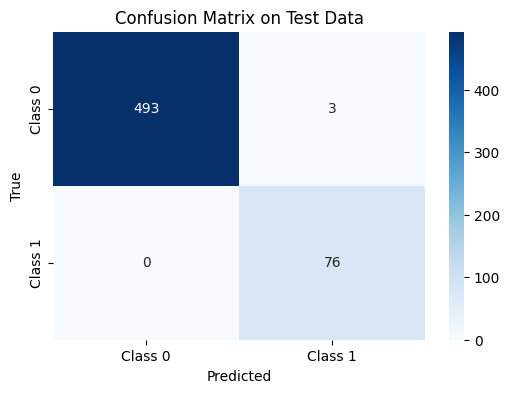

Accuracy: 0.9948
Precision: 0.9620
Recall: 1.0000
F1-Score: 0.9806


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_test_selected = X_test_embeddings_numpy[:, g_best.solution > 0.5]  # Feature selection based on training data
# Reshape test data for LSTM
#X_test_lstm = X_test_embeddings_numpy.reshape(X_test_embeddings_numpy.shape[0], 1, X_test_embeddings_numpy.shape[1])
X_test_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
#X_val_cnn = X_val_fold.reshape(X_val_fold.shape[0], X_val_fold.shape[1], 1)
# Predict on test data
y_test_pred = model_cnn_gwo.predict(X_test_cnn)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold metrics - Accuracy: 0.9945, Precision: 0.9933, Recall: 0.9832, F1: 0.9882


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold metrics - Accuracy: 0.9836, Precision: 0.9682, Recall: 0.9752, F1: 0.9717


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold metrics - Accuracy: 0.9934, Precision: 0.9935, Recall: 0.9835, F1: 0.9884


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold metrics - Accuracy: 0.9934, Precision: 0.9906, Recall: 0.9854, F1: 0.9880


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold metrics - Accuracy: 0.9978, Precision: 0.9964, Recall: 0.9964, F1: 0.9964

Cross-Validation Results:
Accuracy: 0.9926 ± 0.00
Precision: 0.9884 ± 0.01
Recall: 0.9847 ± 0.01
F1 Score: 0.9865 ± 0.01


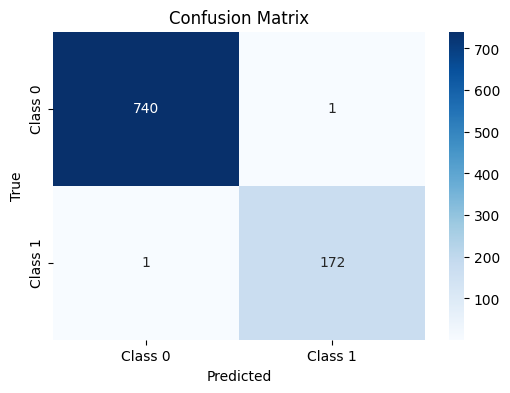

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Prepare the lists for storing metrics across all folds
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Define the KFold cross-validation with 10 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through the KFold splits
for train_index, val_index in kf.split(X_train_embeddings_numpy):  # X_data is your dataset, adjust accordingly
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # y_data is your target variable

    # Step 1: Pad the selected feature sets to match the number of features in X_train_fold
    num_features_in_data = X_train_fold.shape[1]  # This should be 100 for X_train_fold

    # Pad the selected features arrays to match the number of features in X_train_fold
    selected_features_tlbo_padded = np.pad(selected_features_tlbo,
                                           ((0, 0), (0, num_features_in_data - selected_features_tlbo.shape[1])),
                                           mode='constant', constant_values=False)
    selected_features_pso_padded = np.pad(selected_features_pso,
                                          ((0, 0), (0, num_features_in_data - selected_features_pso.shape[1])),
                                          mode='constant', constant_values=False)

    # Step 2: Combine the feature sets using a logical OR operation
    selected_features_combined = np.logical_or(selected_features_tlbo_padded > 0.5, selected_features_pso_padded > 0.5)

    # Step 3: Ensure the selection mask is a 1D boolean array for feature selection
    selected_features_mask = selected_features_combined.any(axis=0)  # Shape should now be (num_features_in_data,)

    # Step 4: Apply the mask to select features from X_train_fold and X_val_fold
    X_train_fold_selected = X_train_fold[:, selected_features_mask]  # Apply selected features to the train set
    X_val_fold_selected = X_val_fold[:, selected_features_mask]      # Apply selected features to the validation set

    # Step 5: Reshape the data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_fold_selected.reshape(X_train_fold_selected.shape[0], 1, X_train_fold_selected.shape[1])
    X_val_lstm = X_val_fold_selected.reshape(X_val_fold_selected.shape[0], 1, X_val_fold_selected.shape[1])

    # Build the LSTM model
    model_lstm_tlbo = Sequential()
    model_lstm_tlbo.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
    model_lstm_tlbo.add(Dropout(0.5))
    model_lstm_tlbo.add(LSTM(32))
    model_lstm_tlbo.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_lstm_tlbo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_tlbo = model_lstm_tlbo.fit(X_train_lstm, y_train_fold, epochs=15, batch_size=16,
                                      validation_data=(X_val_lstm, y_val_fold),
                                      callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_lstm_tlbo.predict(X_val_lstm)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Fold metrics - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
selected_features_mask.shape

(100,)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


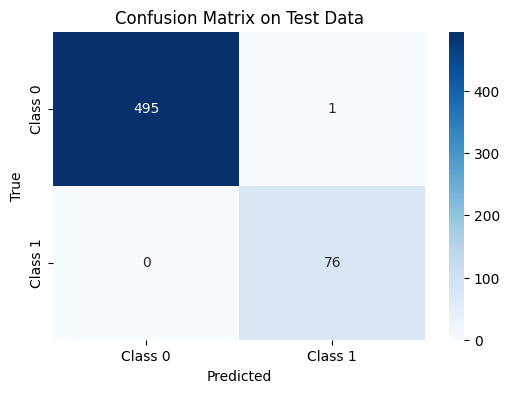

Test Accuracy: 0.9983
Test Precision: 0.9870
Test Recall: 1.0000
Test F1-Score: 0.9935


In [ ]:
# Apply feature selection to test data using the combined feature selection mask (g_best.solution > 0.5)
# This assumes g_best.solution contains the feature selection mask based on combined features.

# Pad the selected feature sets for PSO and TLBO (similar to the padding done for training data)
num_features_in_data = X_train_embeddings_numpy.shape[1]  # This should be the same number of features as in the training data

# Pad PSO and TLBO selected features for the test data to match the number of features in X_train_embeddings
selected_features_tlbo_padded_test = np.pad(selected_features_tlbo,
                                            ((0, 0), (0, num_features_in_data - selected_features_tlbo.shape[1])),
                                            mode='constant', constant_values=False)
selected_features_pso_padded_test = np.pad(selected_features_pso,
                                           ((0, 0), (0, num_features_in_data - selected_features_pso.shape[1])),
                                           mode='constant', constant_values=False)

# Combine the feature sets using a logical OR operation (same as done for training/validation data)
selected_features_combined_test = np.logical_or(selected_features_tlbo_padded_test > 0.5, selected_features_pso_padded_test > 0.5)

# Ensure the selection mask is a 1D boolean array for feature selection in the test data
selected_features_mask_test = selected_features_combined_test.any(axis=0)  # Shape should now be (num_features_in_data,)

# Apply the combined feature selection mask to the test data
X_test_selected = X_test_embeddings_numpy[:, selected_features_mask_test]

# Reshape the selected test data for LSTM (samples, timesteps, features)
X_test_lstm = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])

# Predict on test data using the trained model
y_test_pred = model_lstm_tlbo.predict(X_test_lstm)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute metrics on the test data
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix for the test data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Data')
plt.show()

# Display metrics for the test data
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold metrics - Accuracy: 0.9934, Precision: 0.9893, Recall: 0.9826, F1: 0.9859


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold metrics - Accuracy: 0.9891, Precision: 0.9765, Recall: 0.9859, F1: 0.9812


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold metrics - Accuracy: 0.9956, Precision: 0.9974, Recall: 0.9873, F1: 0.9923


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold metrics - Accuracy: 0.9934, Precision: 0.9906, Recall: 0.9854, F1: 0.9880


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold metrics - Accuracy: 0.9967, Precision: 0.9936, Recall: 0.9958, F1: 0.9947

Cross-Validation Results:
Accuracy: 0.9937 ± 0.00
Precision: 0.9895 ± 0.01
Recall: 0.9874 ± 0.00
F1 Score: 0.9884 ± 0.00


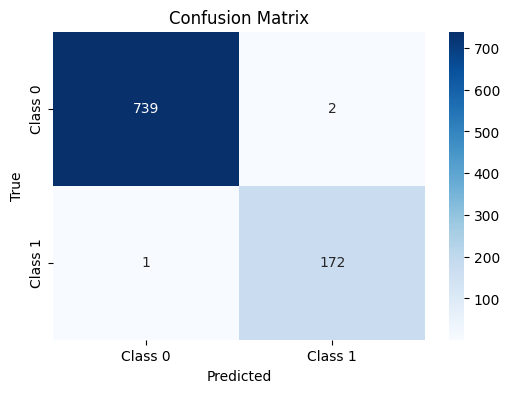

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Dense, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Prepare the lists for storing metrics across all folds
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Define the KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through the KFold splits
for train_index, val_index in kf.split(X_train_embeddings_numpy):  # X_train_embeddings_numpy is your dataset
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train_embeddings_numpy[train_index], X_train_embeddings_numpy[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # y_train is your target variable

    # Step 1: Pad the selected feature sets to match the number of features in X_train_fold
    num_features_in_data = X_train_fold.shape[1]  # This should be 100 for X_train_fold

    # Pad the selected features arrays to match the number of features in X_train_fold
    selected_features_tlbo_padded = np.pad(selected_features_tlbo,
                                           ((0, 0), (0, num_features_in_data - selected_features_tlbo.shape[1])),
                                           mode='constant', constant_values=False)
    selected_features_pso_padded = np.pad(selected_features_pso,
                                          ((0, 0), (0, num_features_in_data - selected_features_pso.shape[1])),
                                          mode='constant', constant_values=False)

    # Step 2: Combine the feature sets using a logical OR operation
    selected_features_combined = np.logical_or(selected_features_tlbo_padded > 0.5, selected_features_pso_padded > 0.5)

    # Step 3: Ensure the selection mask is a 1D boolean array for feature selection
    selected_features_mask = selected_features_combined.any(axis=0)  # Shape should now be (num_features_in_data,)

    # Step 4: Apply the mask to select features from X_train_fold and X_val_fold
    X_train_fold_selected = X_train_fold[:, selected_features_mask]  # Apply selected features to the train set
    X_val_fold_selected = X_val_fold[:, selected_features_mask]      # Apply selected features to the validation set

    # Step 5: Reshape the data for CNN (samples, timesteps, features)
    X_train_cnn = X_train_fold_selected.reshape(X_train_fold_selected.shape[0], X_train_fold_selected.shape[1], 1)
    X_val_cnn = X_val_fold_selected.reshape(X_val_fold_selected.shape[0], X_val_fold_selected.shape[1], 1)

    # Build the CNN model
    model_cnn_pso = Sequential()
    model_cnn_pso.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model_cnn_pso.add(Dropout(0.3))
    model_cnn_pso.add(Conv1D(64, kernel_size=3, activation='relu'))
    model_cnn_pso.add(MaxPooling1D(pool_size=2))
    model_cnn_pso.add(Flatten())
    model_cnn_pso.add(Dense(32, activation='relu'))
    model_cnn_pso.add(Dropout(0.3))
    model_cnn_pso.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model_cnn_pso.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history_cnn_pso = model_cnn_pso.fit(X_train_cnn, y_train_fold, epochs=15, batch_size=16,
                                        validation_data=(X_val_cnn, y_val_fold),
                                        callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the validation set
    y_pred = model_cnn_pso.predict(X_val_cnn)
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, average='macro')
    recall = recall_score(y_val_fold, y_pred, average='macro')
    f1 = f1_score(y_val_fold, y_pred, average='macro')

    print(f"Fold metrics - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Summary of metrics across folds
print("\nCross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.2f}")
print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.2f}")

# Final Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Ensure selected_features_combined is a boolean mask (True for selected, False for not selected)
selected_features_mask = selected_features_combined > 0.5  # Features greater than 0.5 are selected
selected_features_mask


array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

Global Best Fitness - PSO Values: [-0.9890686488850022, -0.9890686488850022, -0.989505902929602, -0.989505902929602, -0.989505902929602]
Global Best Fitness - TLBO Values: [-0.9890686488850022, -0.9890686488850022, -0.989505902929602, -0.989943156974202, -0.989943156974202]


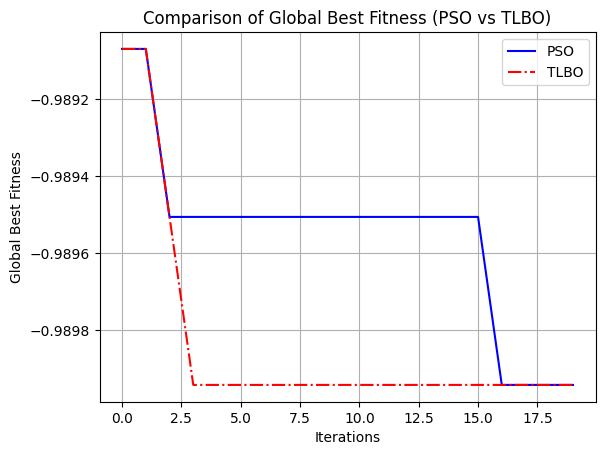

Exploration vs Exploitation - PSO Values: [96.01377377 90.48231595 91.265926   92.88236674 95.62238685]
Exploration vs Exploitation - TLBO Values: [100.          91.72743714  87.77603613  85.59971454  82.47056863]


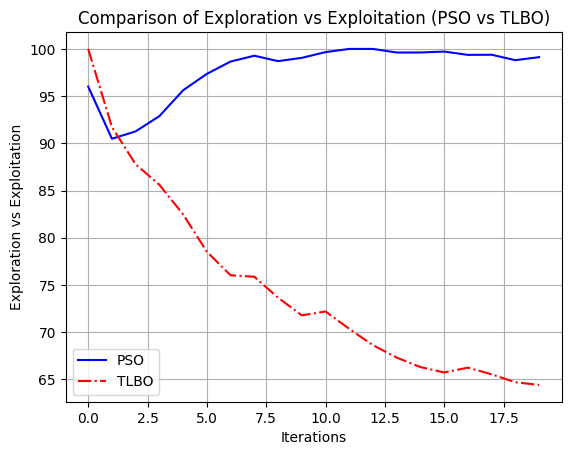

Diversity - PSO Values: [0.19066514277247598, 0.17968071675497574, 0.1812368176721529, 0.18444676237631474, 0.18988792258669232]
Diversity - TLBO Values: [0.22419569057559735, 0.20564896115181047, 0.19679009036506728, 0.19191087113438665, 0.18489546086463504]


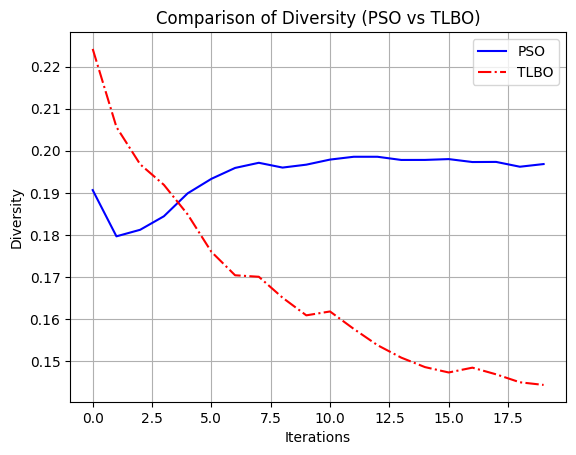

In [ ]:
import matplotlib.pyplot as plt

# Metrics to compare
metrics = [
    ("Global Best Fitness", "list_global_best_fit", "gbfc"),
    #("Local Best Fitness", "list_local_best_fit", "lbfc"),
    ("Exploration vs Exploitation", "list_exploration", "eec"),
    ("Diversity", "list_diversity", "dc"),
]

# Assuming model_pso, model_ga, model_tlbo are the models you're comparing
for metric_name, attribute, filename_suffix in metrics:
    # Get the values for the metric from each model
    pso_values = getattr(model_pso.history, attribute, [])
    # ga_values = getattr(model_ga.history, attribute, [])  # Uncomment if using GA
    tlbo_values = getattr(model_tlbo.history, attribute, [])

    # Print the first few values to check if data exists
    print(f"{metric_name} - PSO Values: {pso_values[:5]}")
    print(f"{metric_name} - TLBO Values: {tlbo_values[:5]}")

    # Create a new figure for each metric
    plt.figure()

    # Plot PSO values if they exist
    if len(pso_values) > 0:
        plt.plot(range(len(pso_values)), pso_values, label="PSO", color="blue", linestyle="-")

    # Plot GA values if they exist
    # if len(ga_values) > 0:
    #     plt.plot(range(len(ga_values)), ga_values, label="GA", color="green", linestyle="--")

    # Plot TLBO values if they exist
    if len(tlbo_values) > 0:
        plt.plot(range(len(tlbo_values)), tlbo_values, label="TLBO", color="red", linestyle="-.")

    # Customize plot
    plt.xlabel("Iterations")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} (PSO vs TLBO)")  # Adjust the title if using GA
    plt.legend()
    plt.grid(True)

    # Save the plot with the appropriate filename
   # plt.savefig(f"images/comparison_{filename_suffix}.png")
    plt.show()  # Display the plot


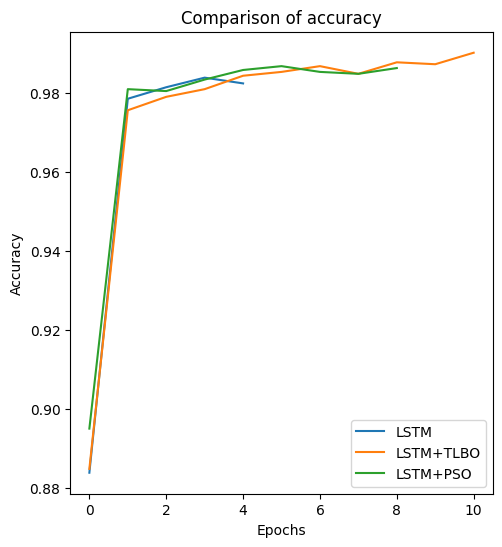

In [ ]:

import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='LSTM')
plt.plot(history_tlbo.history['accuracy'], label='LSTM+TLBO')
plt.plot(history_pso.history['accuracy'], label='LSTM+PSO')
plt.title('Comparison of accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()